In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Load the Titanic dataset
titanic_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# Preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Information about the datasets
titanic_df.info()
print('----------------------------')
test_df.info()

# Drop unnecessary columns
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [5]:
# Feature engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Check if the columns exist before applying pd.get_dummies
columns_to_encode = ['Sex', 'Embarked', 'Pclass']

for col in columns_to_encode:
    if col in titanic_df.columns:
        titanic_df = pd.get_dummies(titanic_df, columns=[col], drop_first=True)
    if col in test_df.columns:
        test_df = pd.get_dummies(test_df, columns=[col], drop_first=True)

In [6]:
# Prepare data for training
X_train = titanic_df.drop('Survived', axis=1)
Y_train = titanic_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print(f'Logistic Regression Training Accuracy: {logreg.score(X_train, Y_train)}')

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
print(f'Random Forest Training Accuracy: {random_forest.score(X_train, Y_train)}')

# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
print(f'SVC Training Accuracy: {svc.score(X_train, Y_train)}')

Logistic Regression Training Accuracy: 0.8069584736251403


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Training Accuracy: 0.9797979797979798
SVC Training Accuracy: 0.6879910213243546


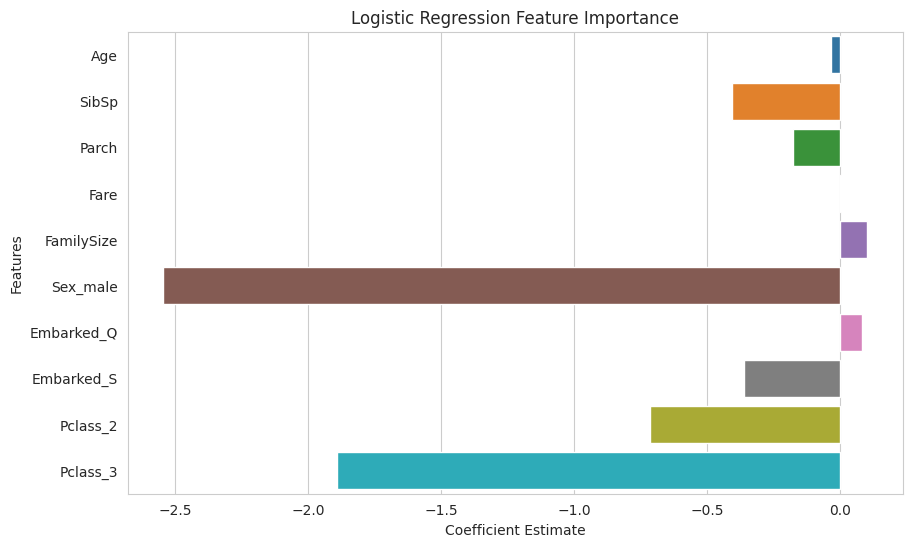

In [7]:
# Visualize feature importance using Logistic Regression coefficients
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient Estimate', y='Features', data=coeff_df)
plt.title('Logistic Regression Feature Importance')
plt.show()

In [8]:
# # Prepare submission
# submission = pd.DataFrame({
#     'PassengerId': test_df['PassengerId'],
#     'Survived': Y_pred_rf  # Using Random Forest predictions as an most accurate one
# })

# submission.to_csv('titanic_submission.csv', index=False)

# This submission turned out as 0.74! 
# Lets try harder

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# GridSearchCV for random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

best_random_forest = grid_search.best_estimator_
print(f'Best params for Random Forest: {grid_search.best_params_}')

# Cross-validation for best model
scores = cross_val_score(best_random_forest, X_train, Y_train, cv=5)
print(f'Average accuracy with cross-validation: {scores.mean()}')

# And prediction on test set...
Y_pred_best_rf = best_random_forest.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] EN

In [10]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred_best_rf
})
submission.to_csv('titanic_submission_improved.csv', index=False)